# Iris Species Prediction using ML Techniques

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop('Id',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualization

<AxesSubplot:>

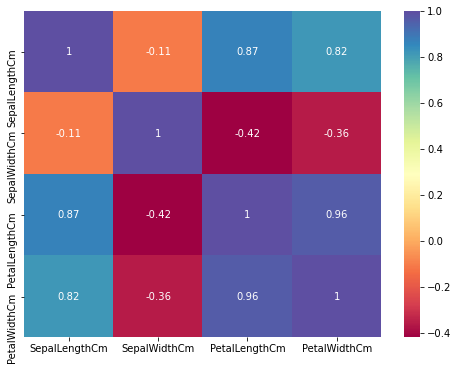

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Spectral)

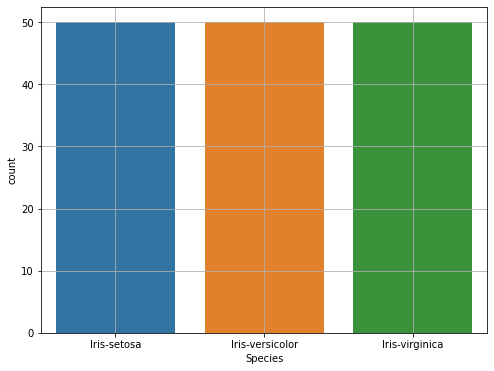

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='Species',data=df)
plt.grid()

In [12]:
le=LabelEncoder()
df['Species_type']=le.fit_transform(df['Species'])

In [14]:
def scatterplot(X,Y):
    sns.scatterplot(data=df,x=X,y=Y,hue='Species')
    plt.title(X+" vs "+Y)
    plt.grid()
    plt.show()

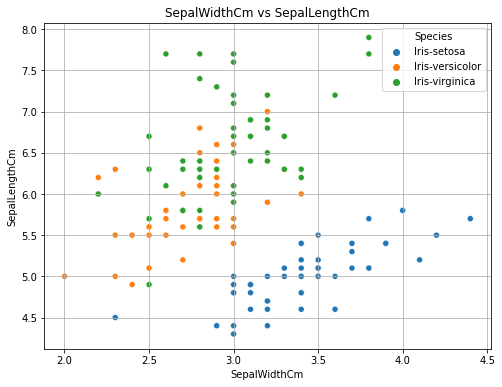

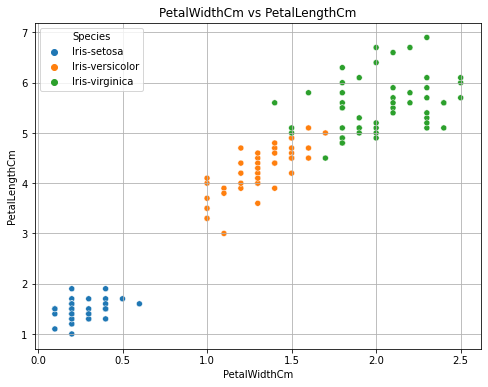

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(8,6))
scatterplot('SepalWidthCm','SepalLengthCm')
plt.figure(figsize=(8,6))
scatterplot('PetalWidthCm','PetalLengthCm')
plt.tight_layout()

/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shivambhosale/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

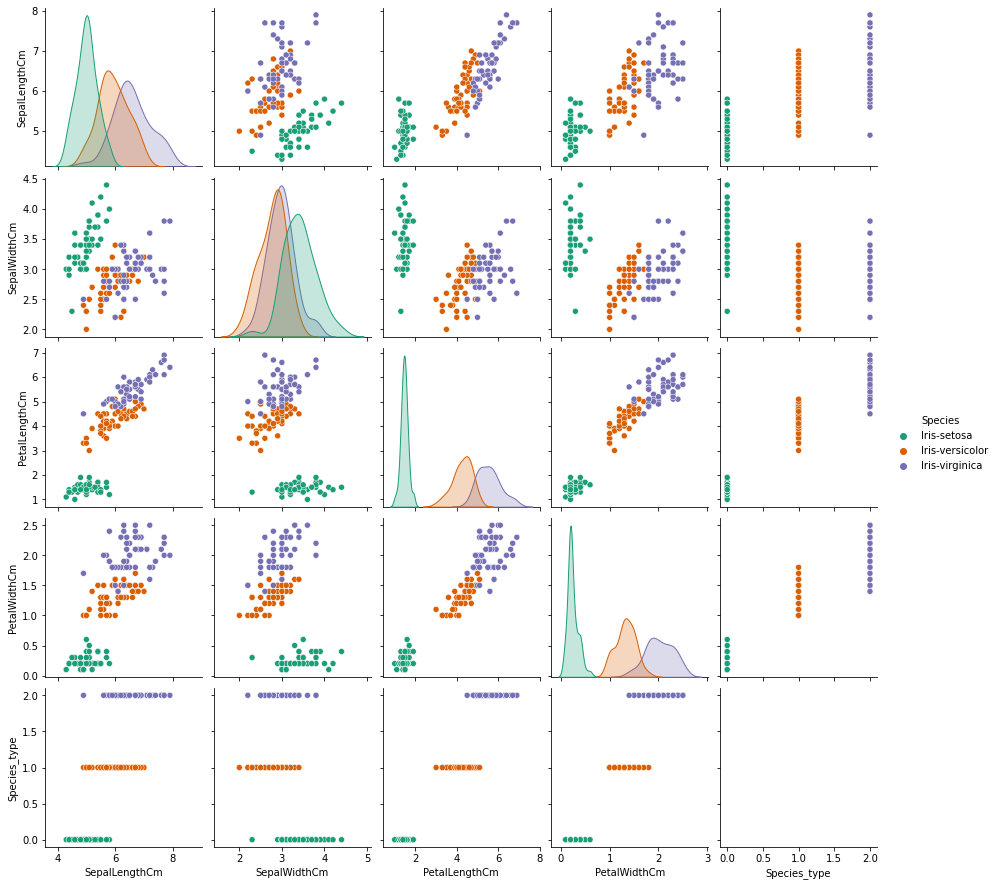

In [18]:
plt.figure(figsize=(10,8))
sns.pairplot(df,hue='Species',palette='Dark2')

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species_type]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species_type]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species_type]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species_type]'>]],
      dtype=object)

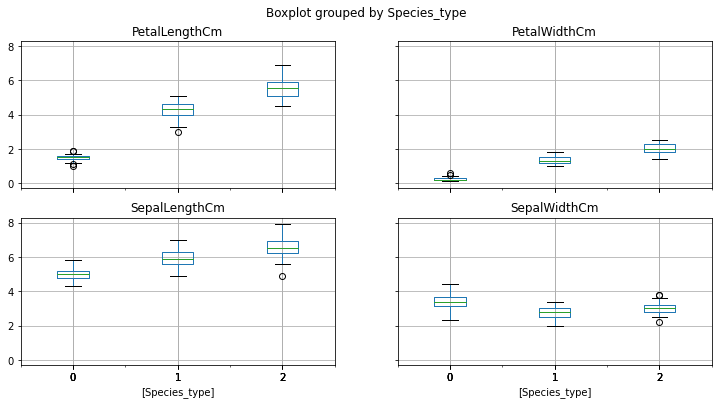

In [19]:
df.boxplot(by="Species_type", figsize=(12, 6))

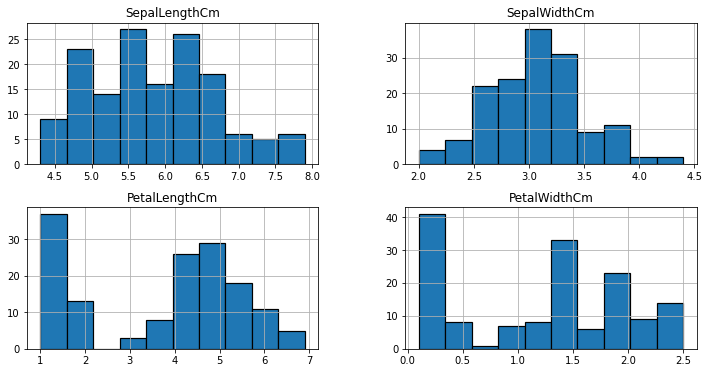

In [20]:
df.drop('Species_type',axis=1).hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

## Model Building

### Train-test Split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(['Species_type','Species'],axis=1),df['Species_type'],test_size=0.25,random_state=8)

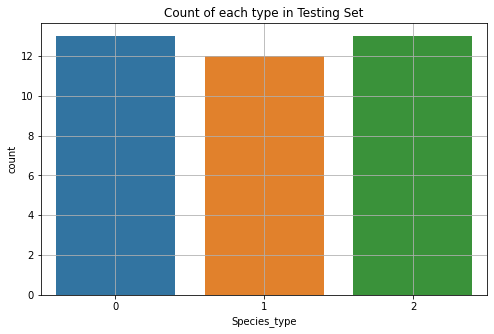

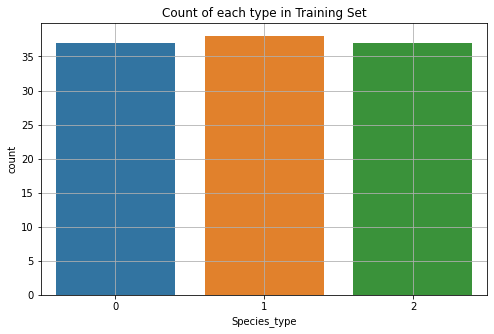

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x=Y_test)
plt.title("Count of each type in Testing Set")
plt.grid()
plt.figure(figsize=(8,5))
sns.countplot(x=Y_train)
plt.title("Count of each type in Training Set")
plt.grid()

### Model Training

In [25]:
models = ['random_forest','svm','decision_tree','logistic_regression','knn']
model_train_acc=[]
model_test_acc=[]

In [26]:
svm= SVC()
svm.fit(X_train,Y_train)
y_hat_train = svm.predict(X_train)
y_hat_test = svm.predict(X_test)
train_acc = np.round(accuracy_score(y_hat_train,Y_train),3)
test_acc =  np.round(accuracy_score(y_hat_test,Y_test),3)

model_train_acc.append(train_acc)
model_test_acc.append(test_acc)

print("Accuracy Score on train data using SVM: ",train_acc)
print("Accuracy Score on test data using SVM: ",test_acc)

Accuracy Score on train data using SVM:  0.955
Accuracy Score on test data using SVM:  0.947


In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_hat_train = rfc.predict(X_train)
y_hat_test = rfc.predict(X_test)
train_acc = np.round(accuracy_score(y_hat_train,Y_train),3)
test_acc =  np.round(accuracy_score(y_hat_test,Y_test),3)

model_train_acc.append(train_acc)
model_test_acc.append(test_acc)

print("Accuracy Score on train data using Decision tree: ",train_acc)
print("Accuracy Score on test data using Decision tree: ",test_acc)

Accuracy Score on train data using Decision tree:  1.0
Accuracy Score on test data using Decision tree:  0.895


In [28]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
y_hat_train = tree.predict(X_train)
y_hat_test = tree.predict(X_test)
train_acc = np.round(accuracy_score(y_hat_train,Y_train),3)
test_acc =  np.round(accuracy_score(y_hat_test,Y_test),3)

model_train_acc.append(train_acc)
model_test_acc.append(test_acc)

print("Accuracy Score on train data using Decision tree: ",train_acc)
print("Accuracy Score on test data using Decision tree: ",test_acc)



Accuracy Score on train data using Decision tree:  1.0
Accuracy Score on test data using Decision tree:  0.895


In [29]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,Y_train)
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)
train_acc = np.round(accuracy_score(y_hat_train,Y_train),3)
test_acc =  np.round(accuracy_score(y_hat_test,Y_test),3)

model_train_acc.append(train_acc)
model_test_acc.append(test_acc)

print("Accuracy Score on train data using Decision tree: ",train_acc)
print("Accuracy Score on test data using Decision tree: ",test_acc)

Accuracy Score on train data using Decision tree:  0.973
Accuracy Score on test data using Decision tree:  0.921


In [30]:
def select_neighbors():
    knn_train_acc=[]
    knn_test_acc=[]
    for i in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,Y_train)
        y_hat_train = knn.predict(X_train)
        y_hat_test = knn.predict(X_test)
        knn_train_acc.append(accuracy_score(y_hat_train,Y_train))
        knn_test_acc.append(accuracy_score(y_hat_test,Y_test))
        
    return knn_train_acc,knn_test_acc

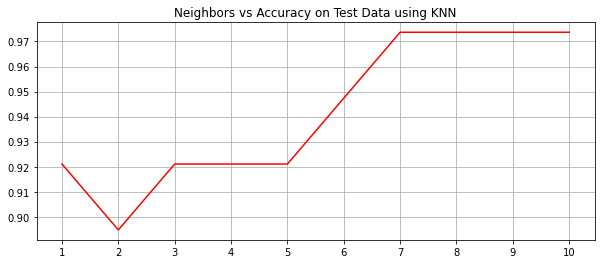

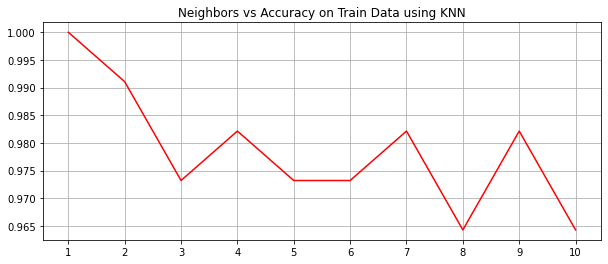

In [31]:
knn_train,knn_test = select_neighbors()
x = np.linspace(1,10,10)

plt.figure(figsize=(10,4))
plt.plot(x,knn_test,color='red')
plt.title("Neighbors vs Accuracy on Test Data using KNN")
plt.xticks(x)
plt.grid()

plt.figure(figsize=(10,4))
plt.plot(x,knn_train,color='red')
plt.title("Neighbors vs Accuracy on Train Data using KNN")
plt.xticks(x)
plt.grid()

In [32]:
train_acc = np.round(knn_train[6],3)
test_acc = np.round(knn_test[6],3)

model_train_acc.append(train_acc)
model_test_acc.append(test_acc)

print("Accuracy Score on train data using Decision tree: ",train_acc)
print("Accuracy Score on test data using Decision tree: ",test_acc)

Accuracy Score on train data using Decision tree:  0.982
Accuracy Score on test data using Decision tree:  0.974


### Model Performance

In [33]:
model_performance = pd.DataFrame({
    'model':models,
    'train_acc':model_train_acc,
    'test_acc':model_test_acc
})
model_performance

,model,train_acc,test_acc
0,random_forest,0.955,0.947
1,svm,1.000,0.895
2,decision_tree,1.000,0.895
3,logistic_regression,0.973,0.921
4,knn,0.982,0.974


In [34]:
### Best Model

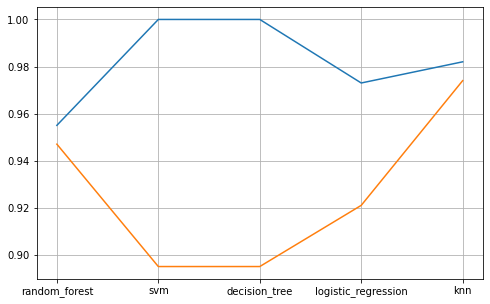

In [35]:
plt.figure(figsize=(8,5))
plt.plot(model_performance['model'],model_performance['train_acc'],label='train_accuracy')
plt.plot(model_performance['model'],model_performance['test_acc'],label='test_accuracy')
plt.grid()
plt.show()